In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
daily = pd.read_csv('../data/mergeddata/merged_daily.csv', parse_dates=["date"])
hourly = pd.read_csv('../data/mergeddata/merged_hourly.csv', parse_dates=["time"])

AQI Trends over time - Temporal Analysis

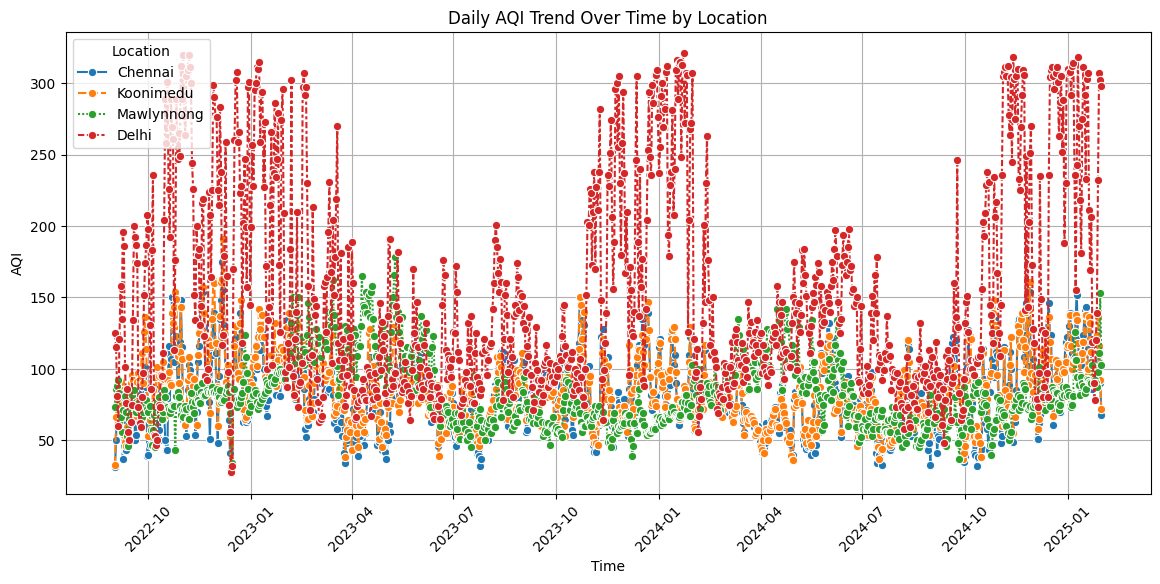

In [3]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily, x="date", y="AQI", hue="Location", style="Location", marker="o")
plt.title("Daily AQI Trend Over Time by Location")
plt.ylabel("AQI")
plt.xlabel("Time")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.grid()
plt.show()


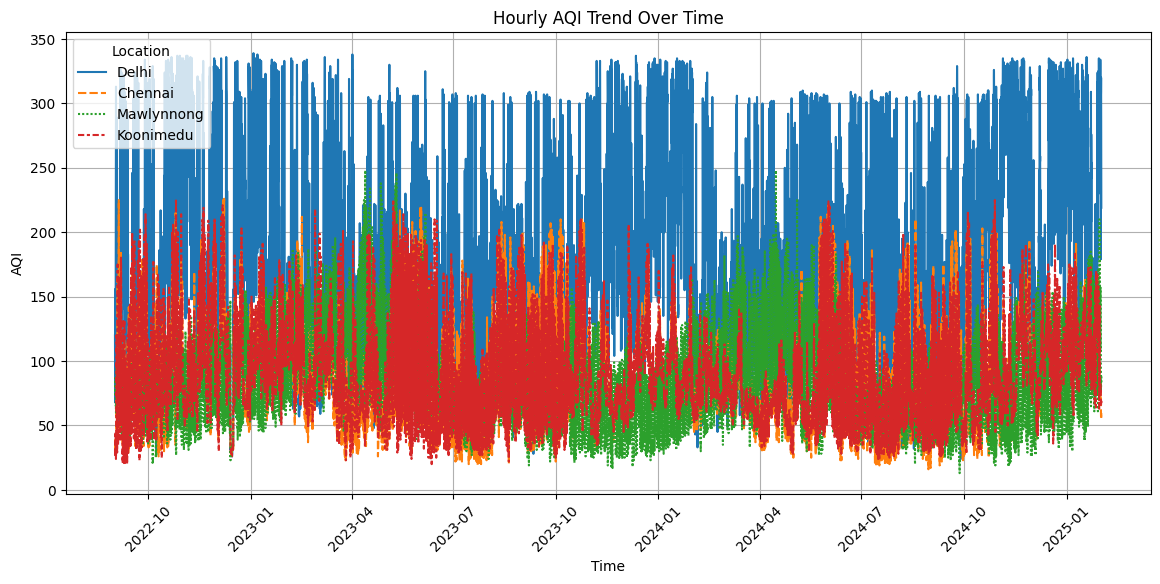

In [4]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly, x="time", y="AQI", hue="Location", style="Location",)
plt.title("Hourly AQI Trend Over Time")
plt.ylabel("AQI")
plt.xlabel("Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Spatial Analysis (AQI by Location)

/tmp/ipykernel_73241/1743522500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Location", y="AQI", data=daily, palette="coolwarm")


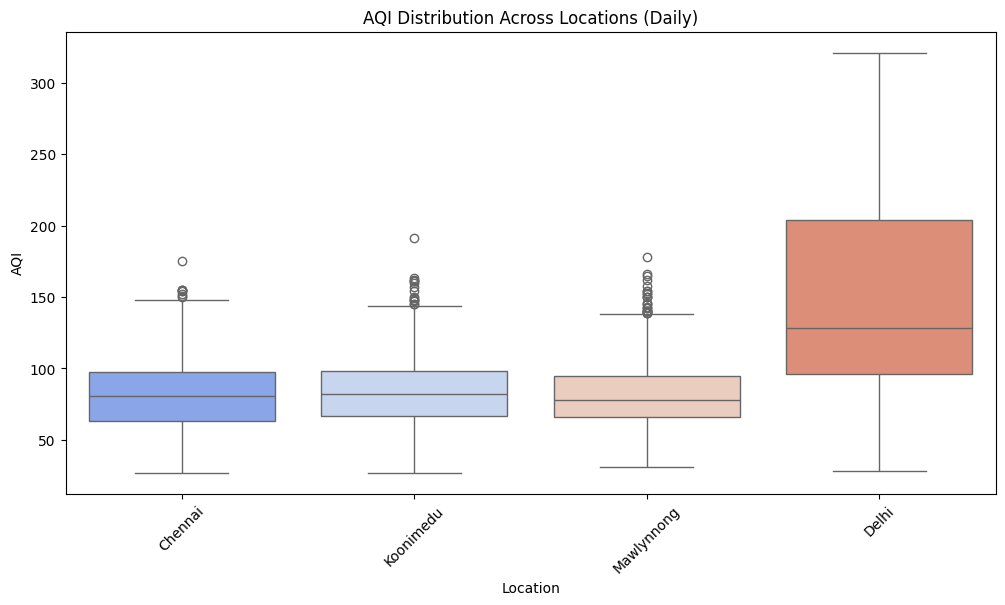

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Location", y="AQI", data=daily, palette="coolwarm")
plt.title("AQI Distribution Across Locations (Daily)")
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_73241/2813076885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Location", y="AQI", data=hourly, palette="coolwarm")


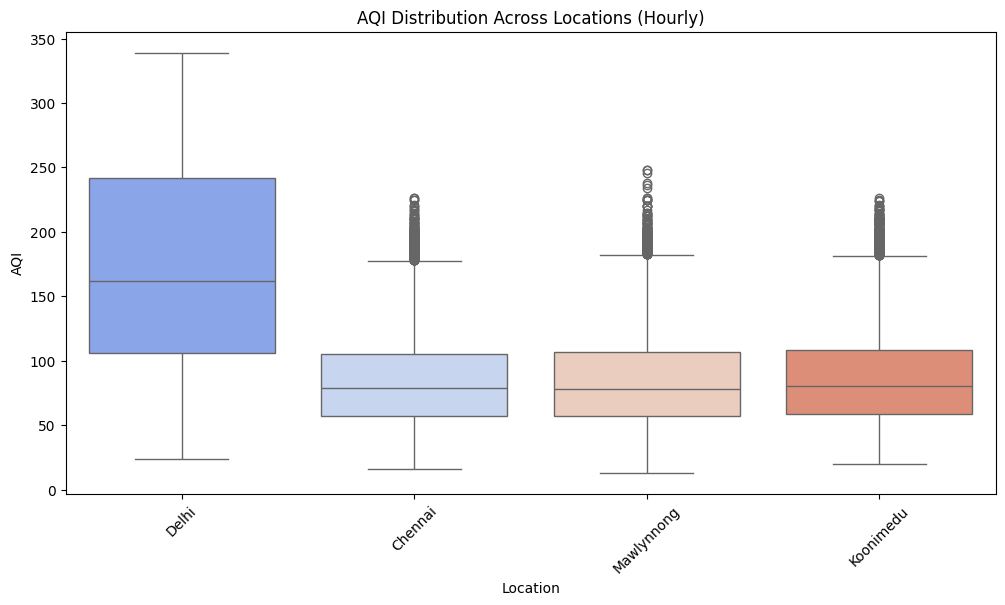

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Location", y="AQI", data=hourly, palette="coolwarm")
plt.title("AQI Distribution Across Locations (Hourly)")
plt.xticks(rotation=45)
plt.show()


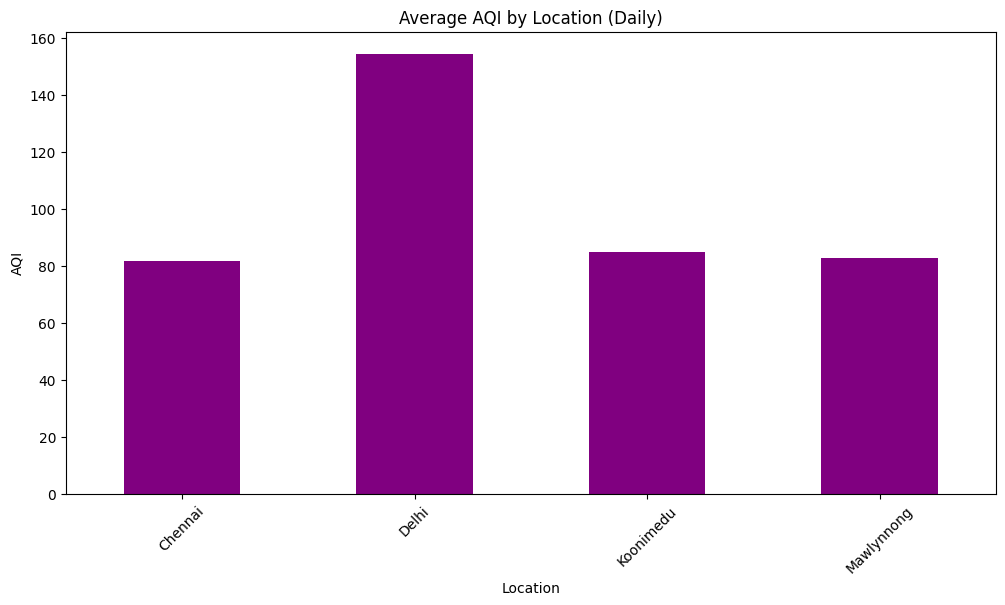

In [7]:
plt.figure(figsize=(12, 6))
daily.groupby("Location")["AQI"].mean().plot(kind="bar", color="purple")
plt.title("Average AQI by Location (Daily)")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.show()


Correlation Analysis

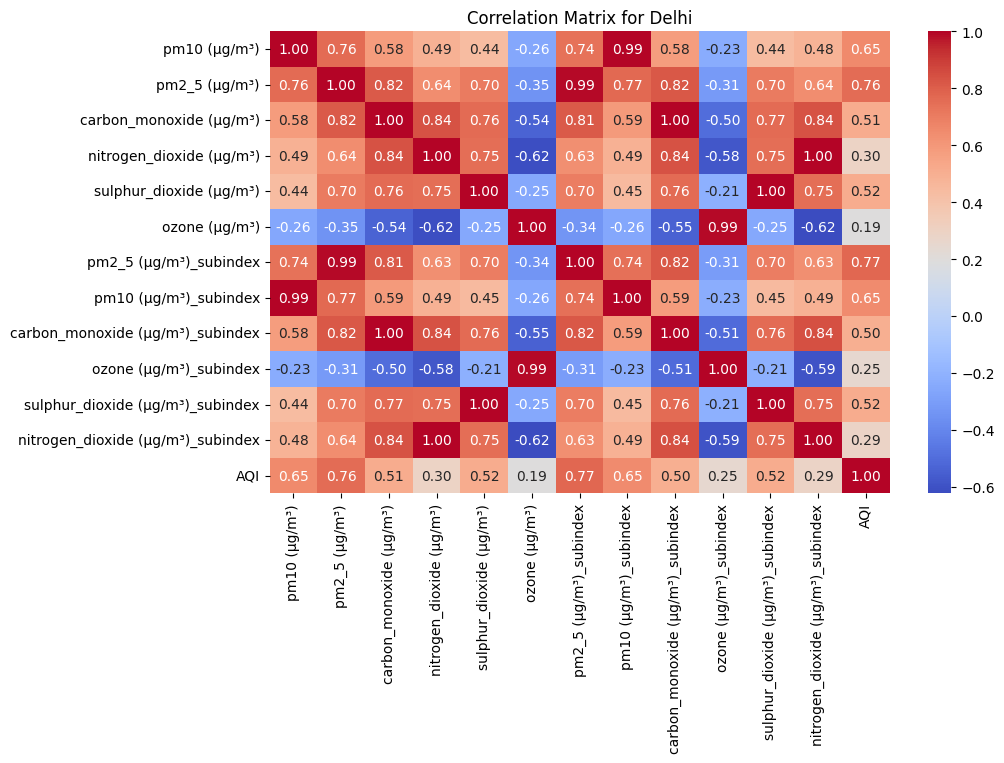

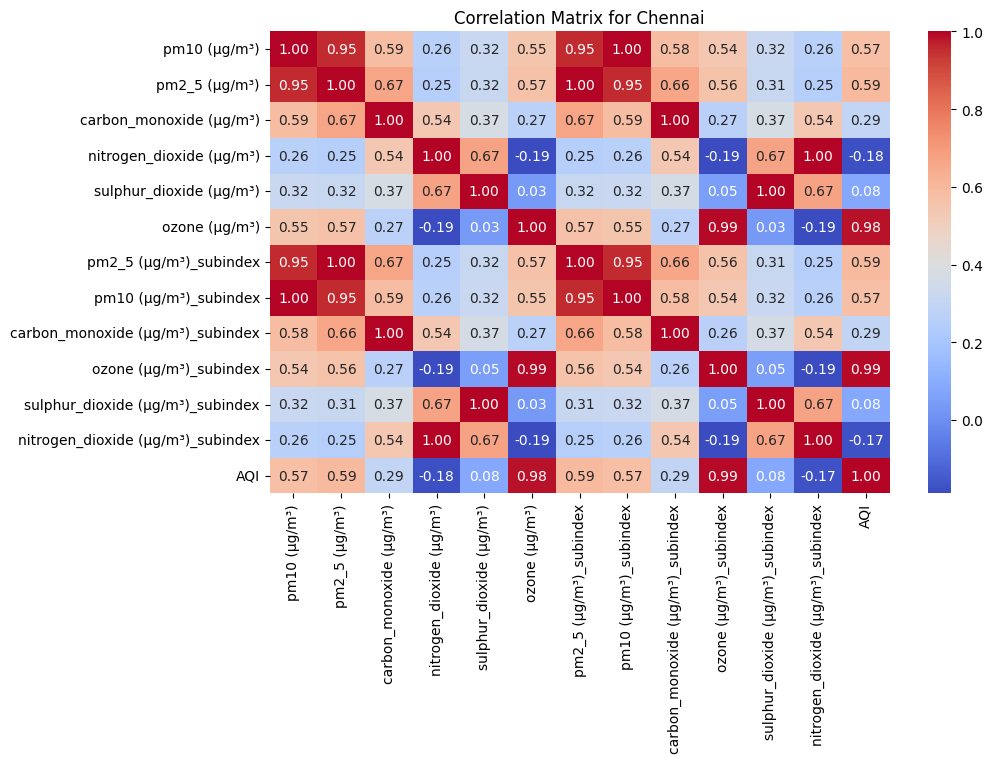

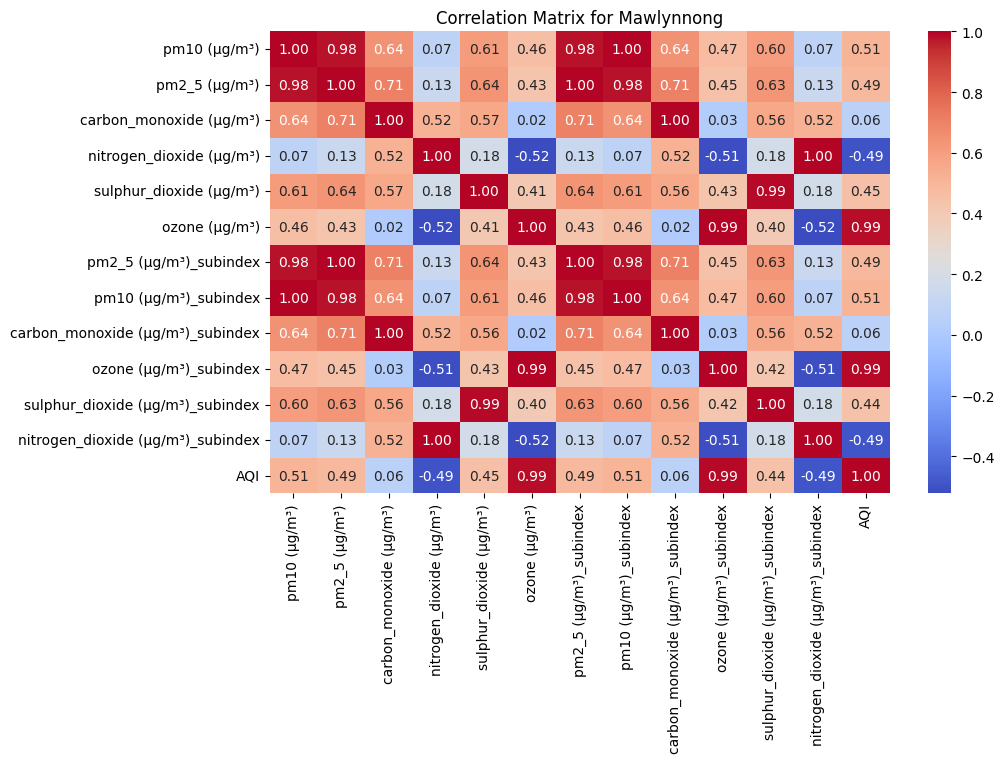

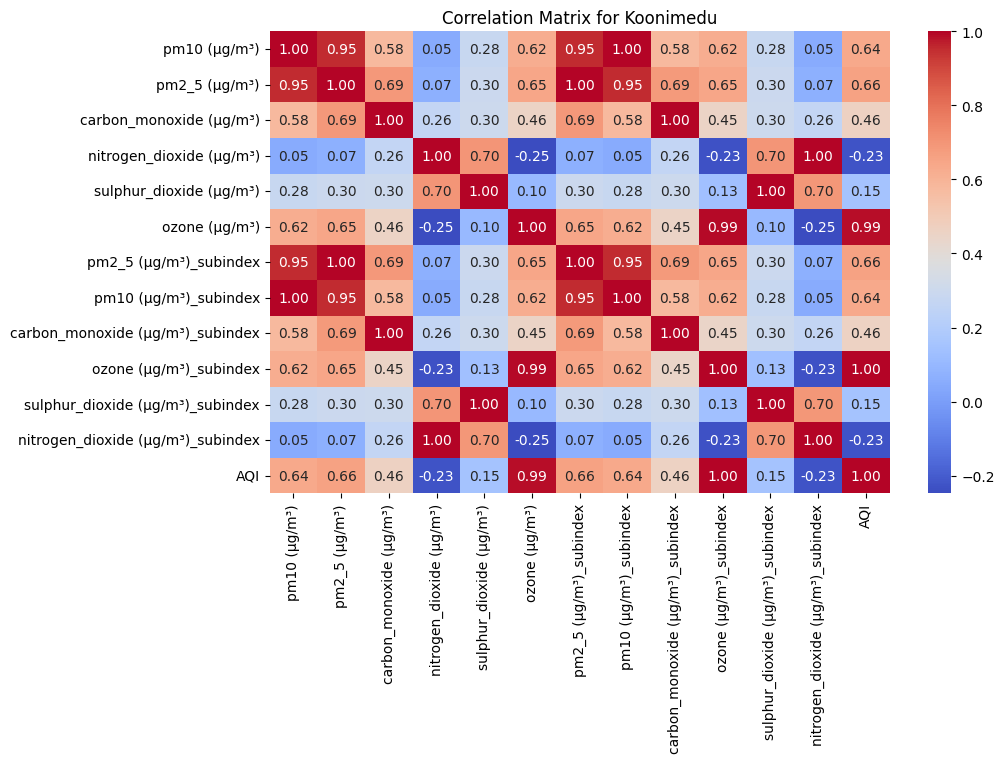

In [8]:
locations = hourly["Location"].unique()

for location in locations:
    plt.figure(figsize=(10, 6))
    location_data = hourly[hourly["Location"] == location].select_dtypes(include=[np.number])
    sns.heatmap(location_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Matrix for {location}")
    plt.show()


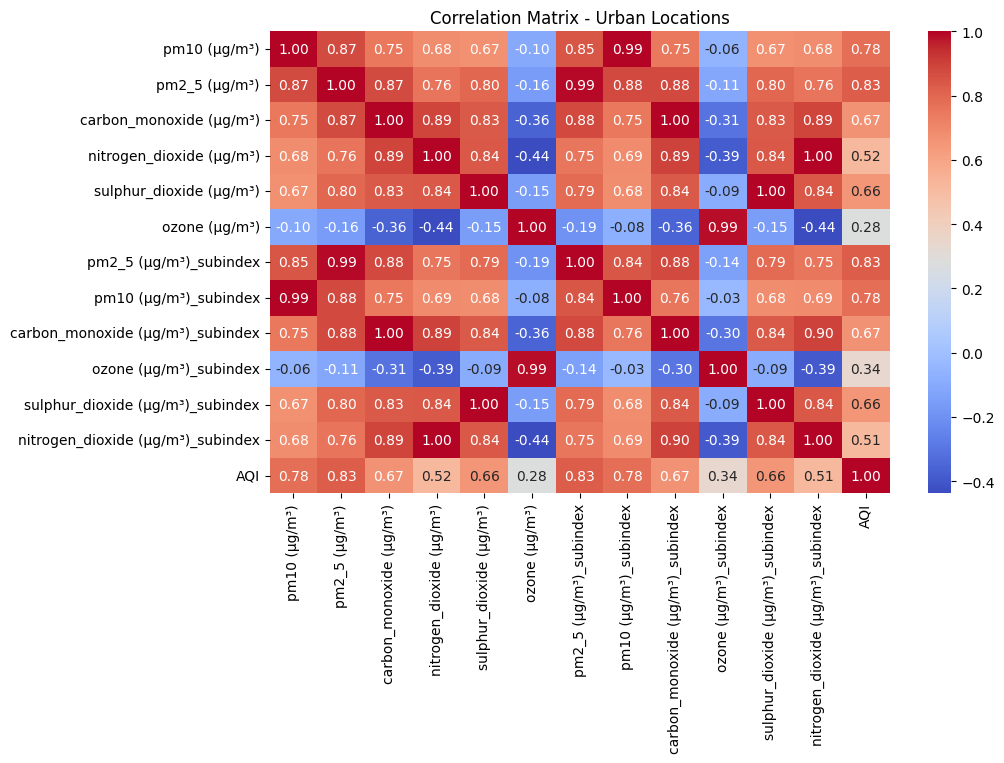

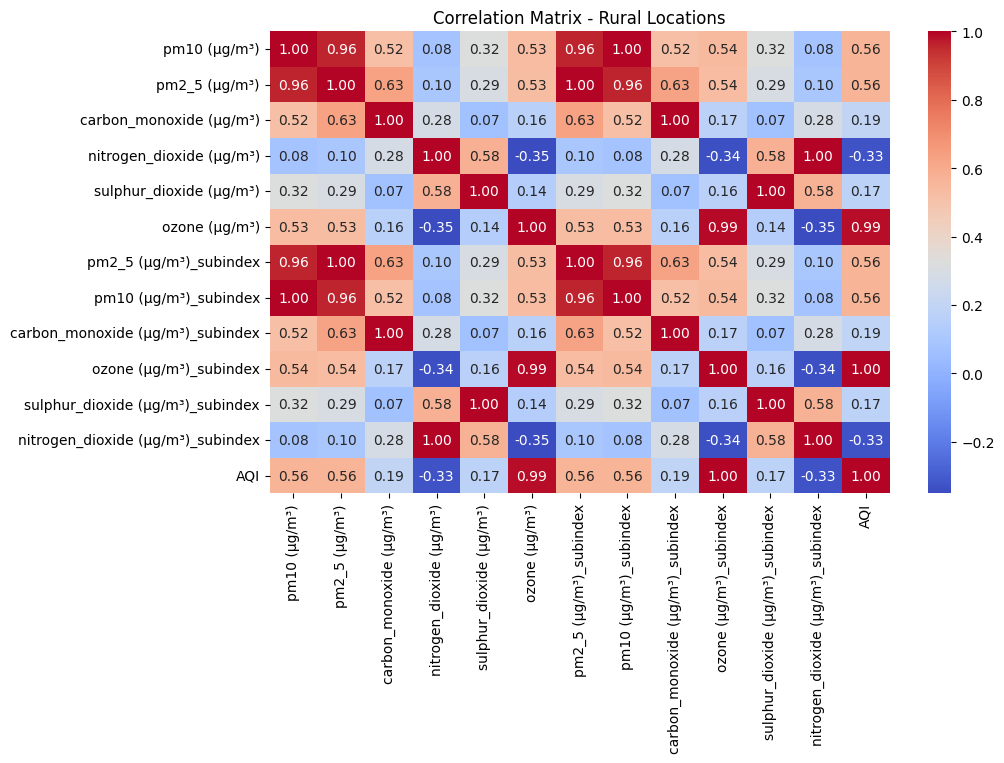

In [9]:
# Split data into urban and rural
urban_data = hourly[hourly["Urban/Rural"] == "Urban"].select_dtypes(include=[np.number])
rural_data = hourly[hourly["Urban/Rural"] == "Rural"].select_dtypes(include=[np.number])

# Urban correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(urban_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - Urban Locations")
plt.show()

# Rural correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(rural_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - Rural Locations")
plt.show()


Spatio-Temporal AQI Variation

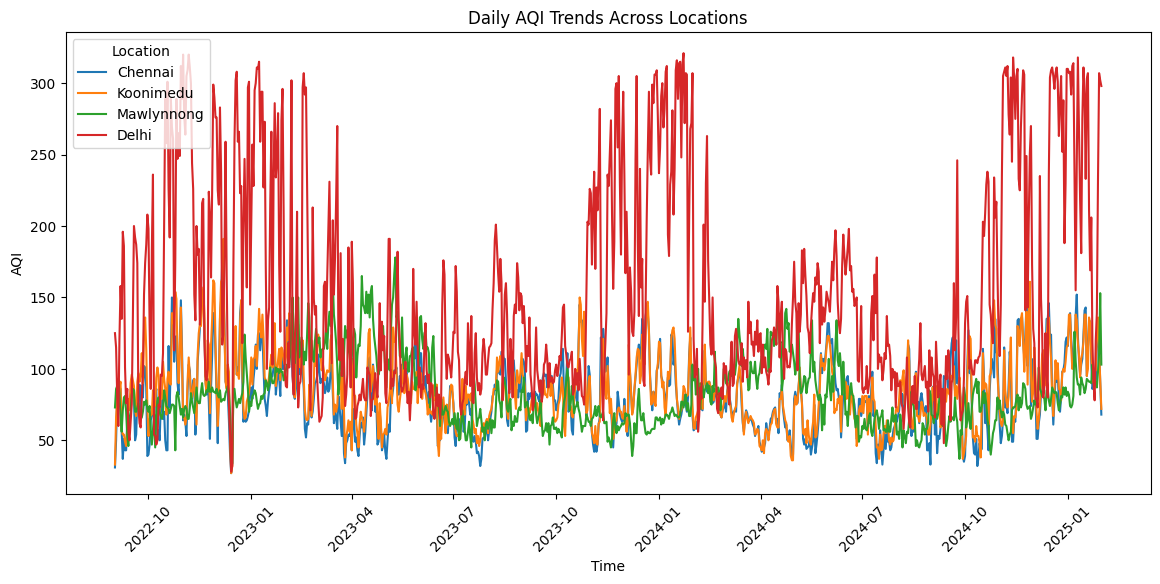

In [10]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily, x="date", y="AQI", hue="Location", palette="tab10")
plt.title("Daily AQI Trends Across Locations")
plt.ylabel("AQI")
plt.xlabel("Time")
plt.legend(title="Location")
plt.xticks(rotation=45)
plt.show()


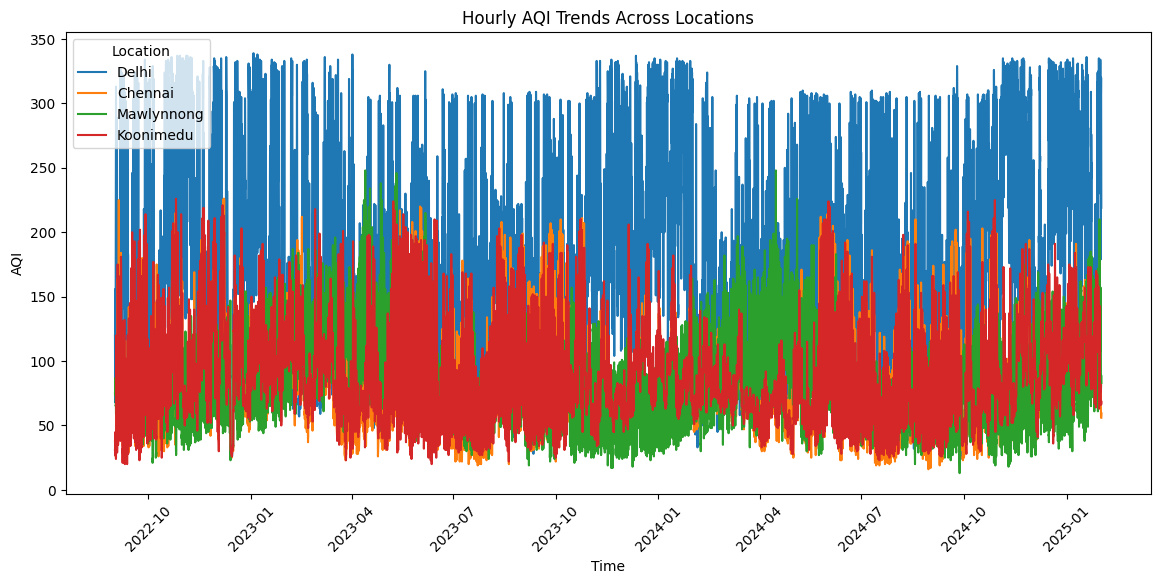

In [11]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly, x="time", y="AQI", hue="Location", palette="tab10")
plt.title("Hourly AQI Trends Across Locations")
plt.ylabel("AQI")
plt.xlabel("Time")
plt.legend(title="Location")
plt.xticks(rotation=45)
plt.show()
